Датасет взят отсюда

https://www.kaggle.com/datasnaek/youtube-new?select=CAvideos.csv



# Общая информация

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('USvideos.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [15]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2c2037ce80>,
      dtype=object)

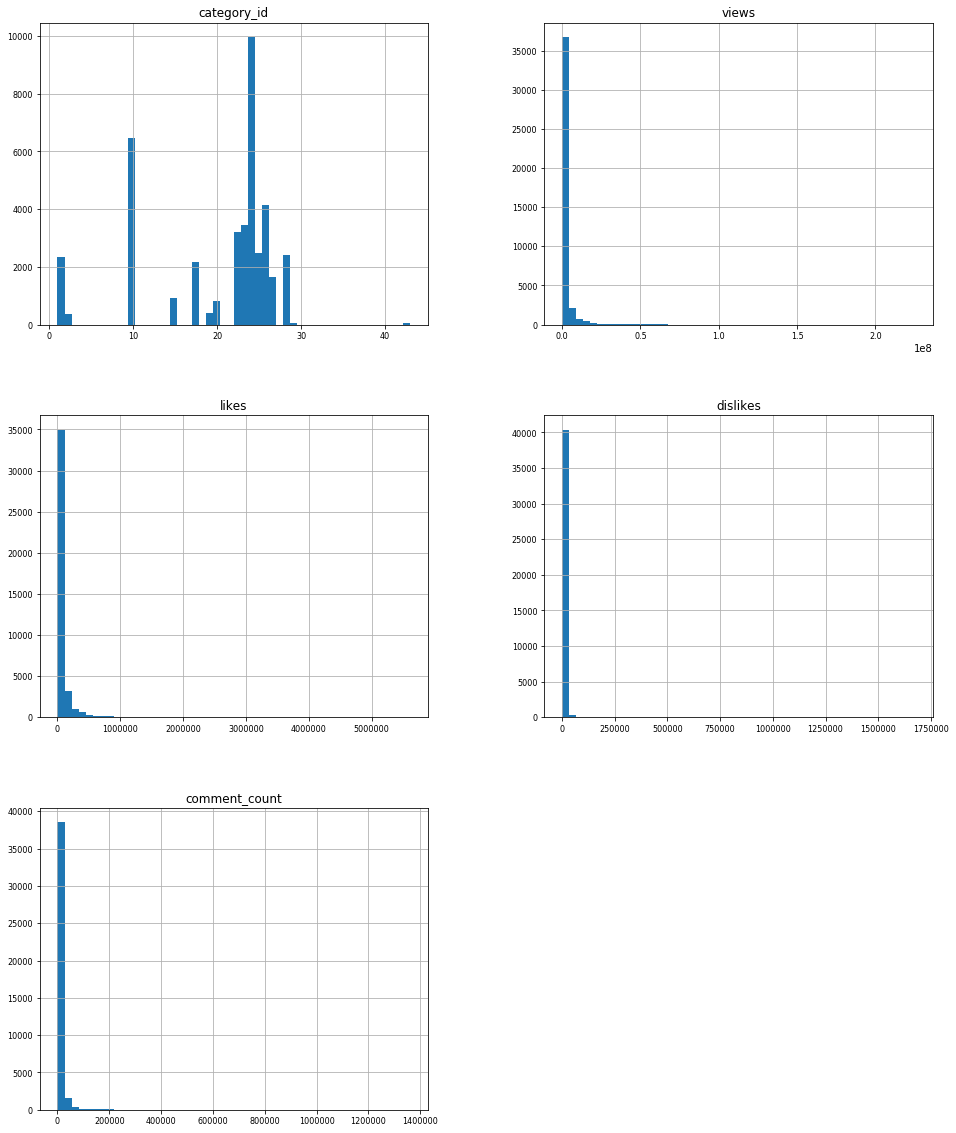

In [16]:
df_num = df.select_dtypes(include=['float64', 'int64'])
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

Исходя из графиков видно, что самая популярная категория (по количеству попаданий) - категория под номером 24

In [17]:
df['category_id'].value_counts()

24    9964
10    6472
26    4146
23    3457
22    3210
25    2487
28    2401
1     2345
17    2174
27    1656
15     920
20     817
19     402
2      384
29      57
43      57
Name: category_id, dtype: int64

# Очевидные зависимости?

А что, если посмотреть на перекрестие этих графиков, может быть там есть какие-то очевидные зависимости

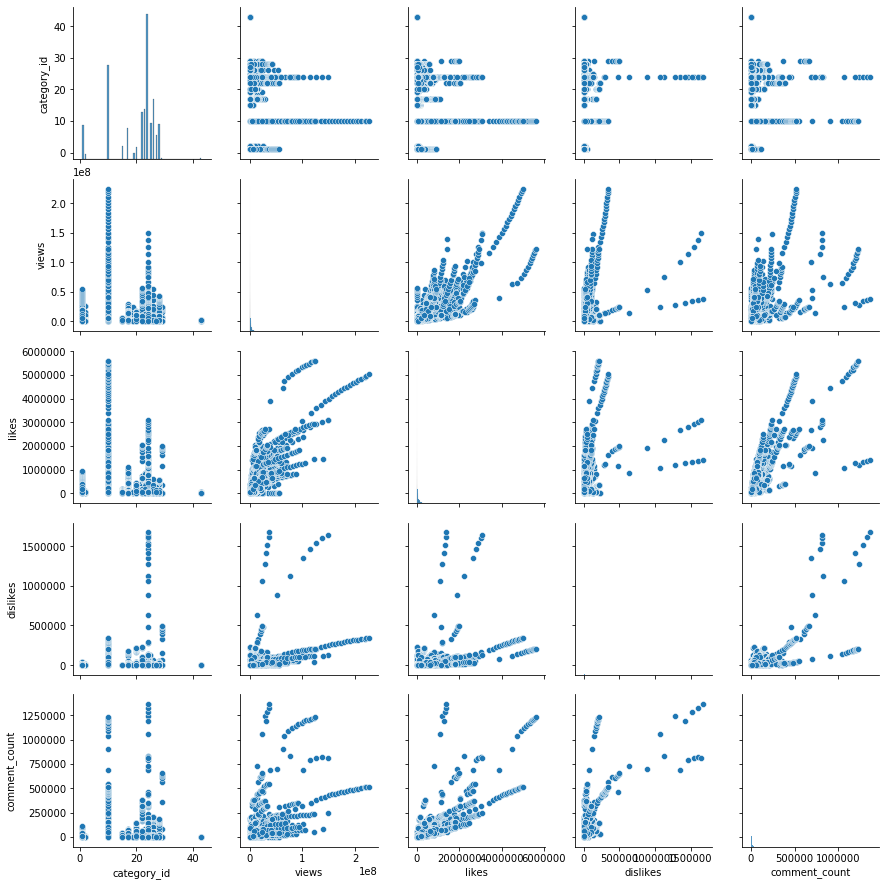

In [18]:
sns.pairplot(df_num, vars=df_num.columns)

А здесь видно, что больше просмотров все-таки набирает категория под номером 10

# БОЛЬШИЕ БУКВЫ

Из западного ютуба пришел тренд называть видео большими буквами. Давайте выясним, помагает ли это им набрать просмотры

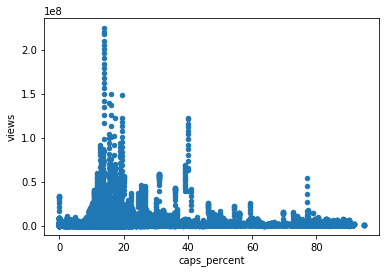

In [19]:
def caps_percent_count(title: str) -> float:
    result = sum(1 for c in title if c.isupper())
    return result * 100 / len(title)

# Выясним, сколько процентов больших букв содержится в названиях
df['caps_percent'] = df['title'].apply(caps_percent_count)
df.plot.scatter(y='views', x='caps_percent')

Как видно на графике большой корреляции заметно не было. Может быть это помогает набрать комментарии или лайки?

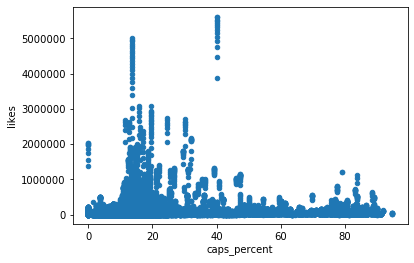

In [21]:
df.plot.scatter(y='likes', x='caps_percent')

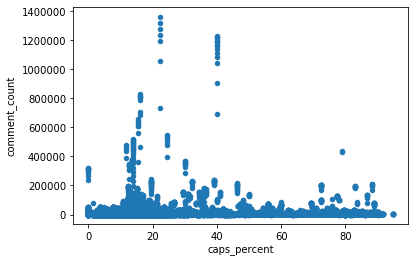

In [23]:
df.plot.scatter(y='comment_count', x='caps_percent')

И здесь никаких явных тенденций видно не было

# А что насчет тегов?

Авторы часто пытаются добавить много тегов в свои видео в надежде на популярность. Посмотрим, есть ли здесь зависимость

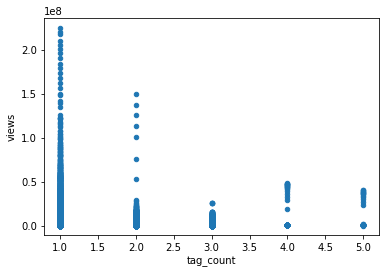

In [24]:
def tag_count(string: str) -> int:
    return len(string.split('|'))


df['tag_count'] = df['title'].apply(tag_count)
df.plot.scatter(y='views', x='tag_count')

In [26]:
df['tag_count'].value_counts()

1    32413
2     6241
3     2195
4       60
5       40
Name: tag_count, dtype: int64

Оказывается, авторы даже не пытаются писать много тегов, большая часть датасета имеет только 1 тег